<a href="https://colab.research.google.com/github/ZynTran/Fuzzy_Logic/blob/main/Grab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 15.4 MB/s eta 0:00:00


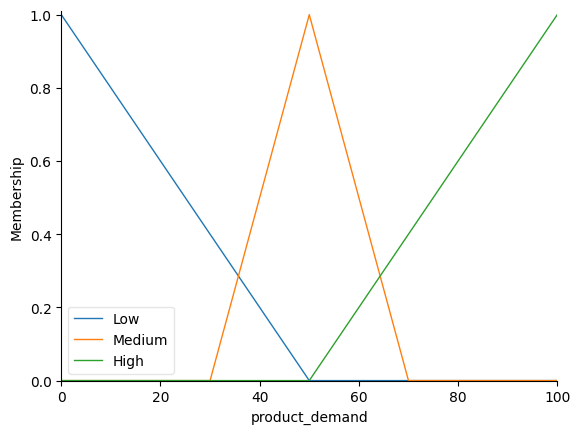

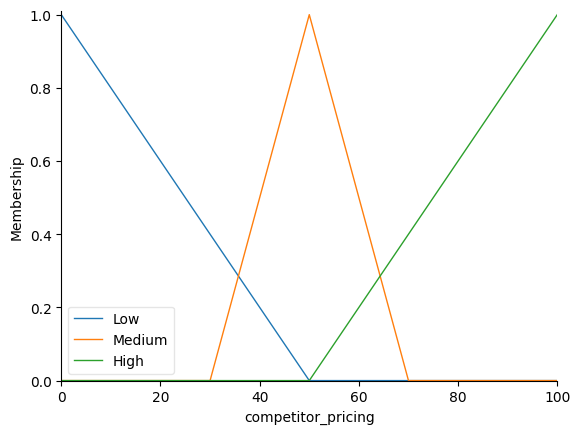

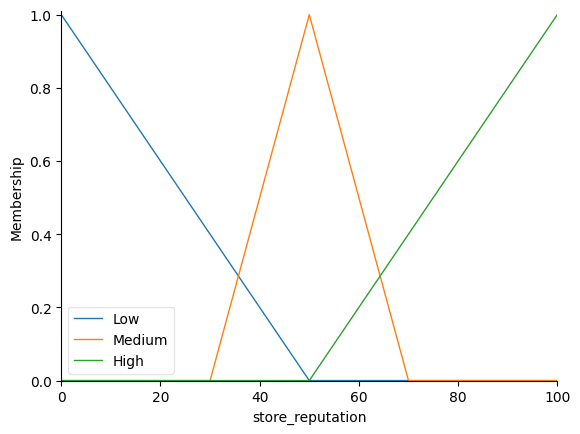

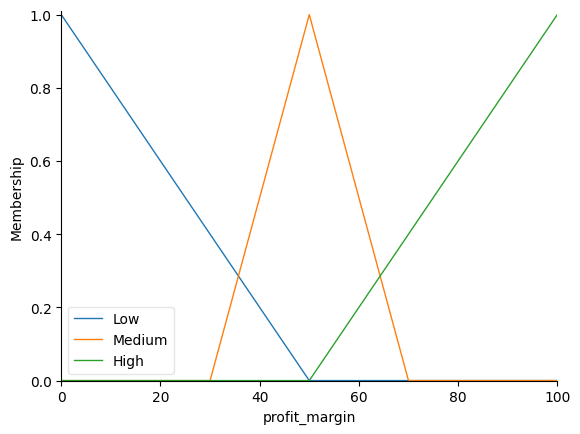

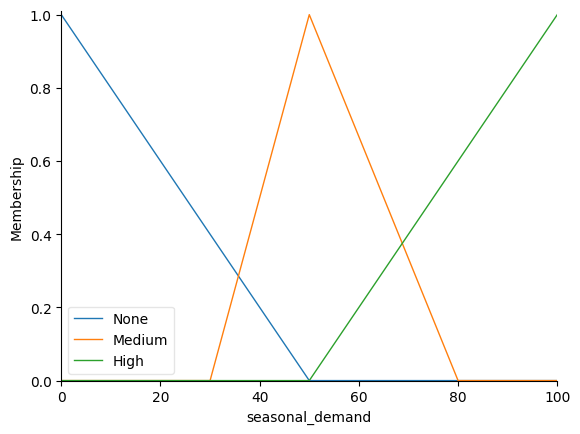

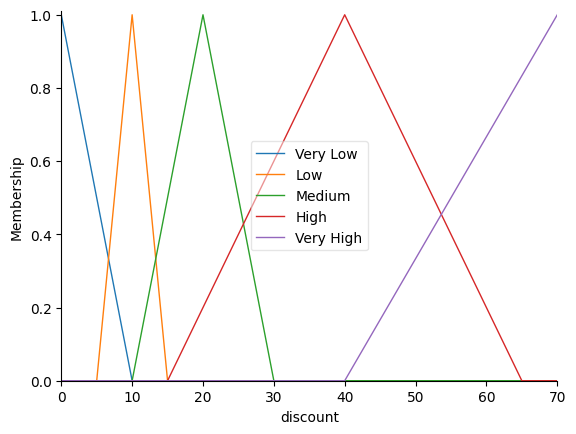

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

product_demand = ctrl.Antecedent(np.arange(0, 101, 1), 'product_demand')
competitor_pricing = ctrl.Antecedent(np.arange(0, 101, 1), 'competitor_pricing')
store_reputation = ctrl.Antecedent(np.arange(0, 101, 1), 'store_reputation')
profit_margin = ctrl.Antecedent(np.arange(0, 101, 1), 'profit_margin')
seasonal_demand = ctrl.Antecedent(np.arange(0, 101, 1), 'seasonal_demand')

discount = ctrl.Consequent(np.arange(0, 71, 1), 'discount')

product_demand['Low'] = fuzz.trimf(product_demand.universe, [0, 0, 50])
product_demand['Medium'] = fuzz.trimf(product_demand.universe, [30, 50, 70])
product_demand['High'] = fuzz.trimf(product_demand.universe, [50, 100, 100])

competitor_pricing['Low'] = fuzz.trimf(competitor_pricing.universe, [0, 0, 50])
competitor_pricing['Medium'] = fuzz.trimf(competitor_pricing.universe, [30, 50, 70])
competitor_pricing['High'] = fuzz.trimf(competitor_pricing.universe, [50, 100, 100])

store_reputation['Low'] = fuzz.trimf(store_reputation.universe, [0, 0, 50])
store_reputation['Medium'] = fuzz.trimf(store_reputation.universe, [30, 50, 70])
store_reputation['High'] = fuzz.trimf(store_reputation.universe, [50, 100, 100])

profit_margin['Low'] = fuzz.trimf(profit_margin.universe, [0, 0, 50])
profit_margin['Medium'] = fuzz.trimf(profit_margin.universe, [30, 50, 70])
profit_margin['High'] = fuzz.trimf(profit_margin.universe, [50, 100, 100])

seasonal_demand['None'] = fuzz.trimf(seasonal_demand.universe, [0, 0, 50])
seasonal_demand['Medium'] = fuzz.trimf(seasonal_demand.universe, [30, 50, 80])
seasonal_demand['High'] = fuzz.trimf(seasonal_demand.universe, [50, 100, 100])

discount['Very Low'] = fuzz.trimf(discount.universe, [0, 0, 10])
discount['Low'] = fuzz.trimf(discount.universe, [5, 10, 15])
discount['Medium'] = fuzz.trimf(discount.universe, [10, 20, 30])
discount['High'] = fuzz.trimf(discount.universe, [15, 40, 65])
discount['Very High'] = fuzz.trimf(discount.universe, [40, 70, 70])

product_demand.view()
competitor_pricing.view()
store_reputation.view()
profit_margin.view()
seasonal_demand.view()
discount.view()


In [5]:
rule1 = ctrl.Rule(product_demand['High'] & competitor_pricing['Low'] & profit_margin['Low'], discount['Very Low'])
rule2 = ctrl.Rule(product_demand['Low'] & competitor_pricing['High'] & profit_margin['High'], discount['High'])
rule3 = ctrl.Rule(store_reputation['High'] & profit_margin['Medium'] & seasonal_demand['High'], discount['Medium'])
rule4 = ctrl.Rule(competitor_pricing['High'] & seasonal_demand['High'] & profit_margin['High'], discount['Very High'])
rule5 = ctrl.Rule(store_reputation['Low'] & product_demand['Medium'] & profit_margin['Low'], discount['Medium'])
rule6 = ctrl.Rule(product_demand['High'] & seasonal_demand['None'] & competitor_pricing['Low'], discount['Very Low'])
rule7 = ctrl.Rule(profit_margin['High'] & competitor_pricing['Medium'] & seasonal_demand['Medium'], discount['Medium'])

Discount Percentage: 23.395172189498833


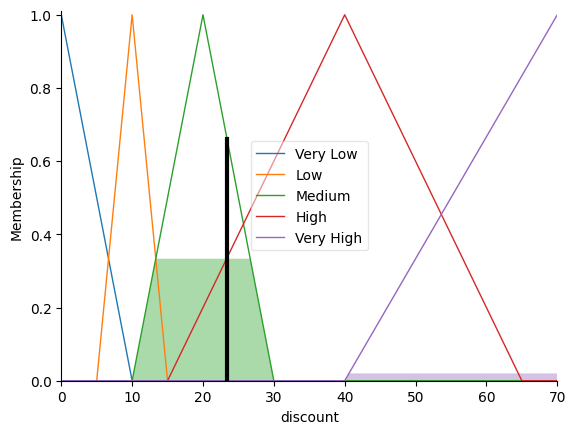

In [6]:
bai3_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
discount_simulation = ctrl.ControlSystemSimulation(bai3_ctrl)

discount_simulation.input['product_demand'] = 86   #cao
discount_simulation.input['competitor_pricing'] = 51  #trung bình
discount_simulation.input['store_reputation'] = 50  #trung bình
discount_simulation.input['profit_margin'] = 80   #cao
discount_simulation.input['seasonal_demand'] = 70  #cao

discount_simulation.compute()

print("Discount Percentage:", discount_simulation.output['discount'])

discount.view(sim=discount_simulation)